In [0]:
#importing libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS  
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
import re
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter
import nltk
WNL = nltk.WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#importing dataset
#df = pd.read_csv('jetblue_cleaned.csv')
#df = pd.read_csv('jetblue_processed.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_tweet_processed.csv')
df_date = df['date'].value_counts().index
dff = df[df['sentiment'] < 0]
dff = dff[['tweet', 'date']]
dff['date'] = pd.to_datetime(dff['date'])
dff = dff.sort_values(by=['date'])
dff = dff.reset_index()
dff = dff.drop(columns=['index'])
print(dff.shape)
dff.head()

(5224, 2)


,tweet,date
0,jetblue unable to complete check in for flt 7...,2018-01-29
1,less than 2 weeks til pitchers catchers repor...,2018-01-30
2,jet blue way to ruin my trip home i am a seni...,2018-01-30
3,dear jetblue i get that you are a hip airline...,2018-01-30
4,jetblue want to bet 1454 doesnt get off the gr...,2018-03-01


In [9]:
df.shape

(12943, 15)

In [10]:
tweet_frequency_distribution_negative = dff.groupby('date').count()
print(tweet_frequency_distribution_negative)

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=tweet_frequency_distribution_negative.index, y=tweet_frequency_distribution_negative['tweet'], mode='lines'))
fig.update_layout(title='Generated Stock Prices', xaxis_title='Timeseries', yaxis_title='Prices')
fig.show()

            tweet
date             
2018-01-29      1
2018-01-30      3
2018-03-01      9
2018-03-14      5
2018-03-15     16
...           ...
2019-10-21      4
2019-10-22      9
2019-10-23      9
2019-10-24     13
2019-10-25      7

[500 rows x 1 columns]


In [11]:
dff = df[df['sentiment'] >= 0]
dff = dff[['tweet', 'date']]
dff['date'] = pd.to_datetime(dff['date'])
dff = dff.sort_values(by=['date'])
dff = dff.reset_index()
dff = dff.drop(columns=['index'])
print(dff.shape)

tweet_frequency_distribution_positive = dff.groupby('date').count()
print(tweet_frequency_distribution_positive)

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=tweet_frequency_distribution_positive.index, y=tweet_frequency_distribution_positive['tweet'], mode='lines'))
fig.update_layout(title='Generated Stock Prices', xaxis_title='Timeseries', yaxis_title='Prices')
fig.show()

(7719, 2)
            tweet
date             
2018-01-29      3
2018-01-30     13
2018-03-01     11
2018-03-14     10
2018-03-15     19
...           ...
2019-10-22     18
2019-10-23     14
2019-10-24     11
2019-10-25     14
2019-10-26      1

[502 rows x 1 columns]


In [12]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=tweet_frequency_distribution_positive.index, y=tweet_frequency_distribution_positive['tweet'], mode='lines', name='positive'))
fig.add_trace(go.Scatter(x=tweet_frequency_distribution_negative.index, y=tweet_frequency_distribution_negative['tweet'], mode='lines', name='negative'))
fig.update_layout(title='Tweet Frequency through time', xaxis_title='Timeseries', yaxis_title='Tweet Frequency')
fig.show()

In [0]:
tweet_idx = tweet_frequency_distribution_negative.index.to_list() #tweet_frequency_distribution_positive.index.to_list()
tweet_freq = tweet_frequency_distribution_negative['tweet'].to_list() #tweet_frequency_distribution_positive['tweet'].to_list()

file = open('negative.txt', 'a')
for idx in range(len(tweet_idx)):
    file.write(' { x: new Date('+str(tweet_idx[idx].year)+', '+str(tweet_idx[idx].month)+', '+str(tweet_idx[idx].day)+'), y: '+str(tweet_freq[idx])+'},\n')


In [153]:
#using this for segregating work cloud by state
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_tweet_processed.csv')
statedf = df[['tweet', 'state', 'sentiment']]
statedf = statedf[statedf['state'].isna() == False]
statedf.reset_index(inplace=True)
statedf = statedf.drop(columns=['index'])

#when state is NY 
statedf = statedf[statedf['sentiment'] < 0]
statedf = statedf[statedf['state'] == ' CA']
print(np.mean(statedf['sentiment'].values))
print(statedf.shape)
statedf.head()

-0.5357142865125623
(28, 3)


,tweet,state,sentiment
62,jetblue you disappoint me rerouting us to lax ...,CA,-0.8
63,2 hour delay at san diego airport due to a clo...,CA,-0.8
151,so after an hr delay we were just informed tha...,CA,-0.9
152,first time ever a bag of ours was destroyed by...,CA,-0.8
186,your wings already exist all you have to do is...,CA,-0.1


In [184]:
#using this for segregating work cloud by months
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_tweet_processed.csv')
monthdf = df[['tweet', 'date', 'sentiment']]
monthdf = monthdf[monthdf['sentiment'] < 0]
monthdf['date'] = pd.to_datetime(monthdf['date'])
monthdf = monthdf.sort_values(by=['date'])

#get tweets between dates
#monthdf = monthdf[(monthdf['date'] >= '2018-01-29') & (monthdf['date'] < '2018-04-29')] #1st bin
#monthdf = monthdf[(monthdf['date'] >= '2018-04-29') & (monthdf['date'] < '2018-07-29')] #2st bin
#monthdf = monthdf[(monthdf['date'] >= '2018-07-29') & (monthdf['date'] < '2018-10-29')] #3st bin
#monthdf = monthdf[(monthdf['date'] >= '2018-10-29') & (monthdf['date'] < '2019-01-29')] #4st bin
#monthdf = monthdf[(monthdf['date'] >= '2019-01-29') & (monthdf['date'] < '2019-04-29')] #5st bin
#monthdf = monthdf[(monthdf['date'] >= '2019-04-29') & (monthdf['date'] < '2019-07-29')] #6st bin
monthdf = monthdf[(monthdf['date'] >= '2019-07-29') & (monthdf['date'] < '2019-10-29')] #7st bin

monthdf.reset_index(inplace=True)
monthdf = monthdf.drop(columns=['index'])

#when state is NY 
print(monthdf.shape)
monthdf.head()

(838, 3)


,tweet,date,sentiment
0,i am so sorry dear blessings to you shame on j...,2019-07-29,-0.2
1,what you did is despicable you can help by cha...,2019-07-29,-0.7
2,this is appalling jetblue impactofmurder https...,2019-07-29,-0.9
3,what you did is despicable jetblue you can hel...,2019-07-29,-0.7
4,americanair you need to take some notes out of...,2019-07-29,-0.3


In [0]:
def prepareStopWords():
 
    stopwordsList = []
 
    # Load default stop words and add a few more specific to my text.
    stopwordsList = stopwords.words('english')
    stopwordsList.append('dont')
    stopwordsList.append('didnt')
    stopwordsList.append('doesnt')
    stopwordsList.append('cant')
    stopwordsList.append('couldnt')
    stopwordsList.append('couldve')
    stopwordsList.append('im')
    stopwordsList.append('ive')
    stopwordsList.append('isnt')
    stopwordsList.append('theres')
    stopwordsList.append('wasnt')
    stopwordsList.append('wouldnt')
    stopwordsList.append('a')
    stopwordsList.append('also')
    stopwordsList.append('http')
    stopwordsList.append('youtube')
    stopwordsList.append('jetblue')
    stopwordsList.append('jet')
    stopwordsList.append('blue')
    stopwordsList.append('twitter')
    stopwordsList.append('com')
 
    return stopwordsList

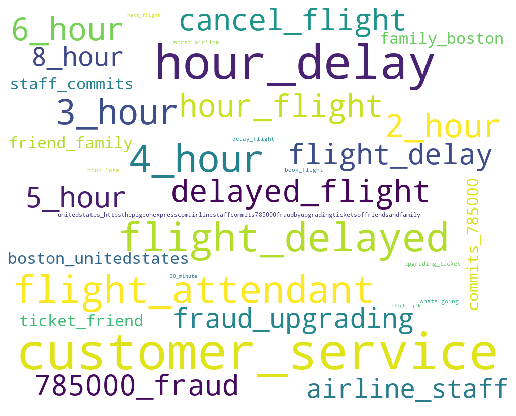

In [186]:
rawText = ''
for text in monthdf.tweet: #statedf.tweet:
    rawText = rawText + text + ' '

rawText = rawText.lower()
 
# Remove single quote early since it causes problems with the tokenizer.
# wasn't turns into 2 entries; was, n't.
rawText = rawText.replace("'", "")
 
tokens = nltk.word_tokenize(rawText)
text = nltk.Text(tokens)
 
# Load default stop words and add a few more.
stopWords = prepareStopWords()
 
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
text_content = [word for word in text_content if word not in stopWords]
 
# After the punctuation above is removed it still leaves empty entries in the list.
# Remove any entries where the len is zero.
text_content = [s for s in text_content if len(s) != 0]
 
# Best to get the lemmas of each word to reduce the number of similar words
# on the word cloud. The default lemmatize method is noun, but this could be
# expanded.
# ex: The lemma of 'characters' is 'character'.
text_content = [WNL.lemmatize(t) for t in text_content]

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# word_dict is the dictionary we'll use for the word cloud.
# Load dictionary with the FOR loop below.
# The dictionary will look like this with the bigram and the score from above.
# word_dict = {'bigram A': 0.000697411,
#             'bigram B': 0.000524882}
 
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 800
WC_width = 1000
WC_max_words = 75
 
wordCloud = WordCloud(max_words=WC_max_words, background_color ='white', height=WC_height, width=WC_width, min_font_size=10)

wordCloud.generate_from_frequencies(word_dict)
 
plt.figure(figsize = (9, 9)) 
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

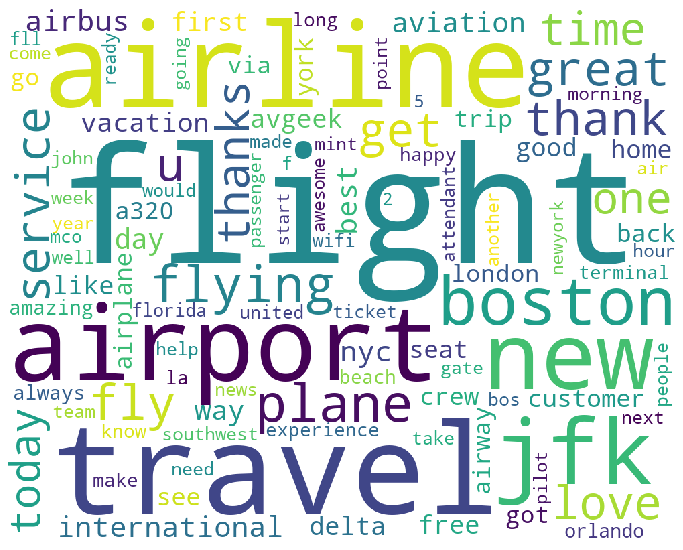

In [151]:
rawText = ''
for text in dff.tweet:
    rawText = rawText + text + ' '

rawText = rawText.lower()
 
# Remove single quote early since it causes problems with the tokenizer.
# wasn't turns into 2 entries; was, n't.
rawText = rawText.replace("'", "")
 
tokens = nltk.word_tokenize(rawText)
text = nltk.Text(tokens)
 
# Load default stop words and add a few more.
stopWords = prepareStopWords()
 
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
text_content = [word for word in text_content if word not in stopWords]
 
# After the punctuation above is removed it still leaves empty entries in the list.
# Remove any entries where the len is zero.
text_content = [s for s in text_content if len(s) != 0]
 
# Best to get the lemmas of each word to reduce the number of similar words
# on the word cloud. The default lemmatize method is noun, but this could be
# expanded.
# ex: The lemma of 'characters' is 'character'.
text_content = [WNL.lemmatize(t) for t in text_content]

fdist = nltk.FreqDist(text_content) 
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 800
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, background_color ='white', height=WC_height, width=WC_width)

wordCloud.generate_from_frequencies(fdist)
 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

In [18]:
dfff = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_tweet_processed.csv')
dfff = dfff[dfff['place'].isna() == False]
dfff = dfff.reset_index()
dfff = dfff.drop(columns=['index', 'Unnamed: 0'])
dfff.shape
#dfff.to_csv('jetblue_location_all.csv')

(1475, 14)

In [20]:
temp = dfff[['state', 'place']].groupby(['state']).count()
print(temp['place'].sort_values(ascending=False))


state
 NY            315
 FL            203
 MA            192
 CA            130
 NJ             37
              ... 
 Morelos         1
 Maho Beach      1
 MT              1
 MS              1
 AR              1
Name: place, Length: 96, dtype: int64


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
#text cleaning
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_processed.csv')

rows, columns = df.shape
df['cleaned_tweet'] = ''
df.columns[-1]

'cleaned_tweet'

In [0]:


for row in range(rows):

    rawText = ''
    rawText = str(df.iloc[row, 8])
    rawText = rawText.lower()
 
    # Remove single quote early since it causes problems with the tokenizer.
    # wasn't turns into 2 entries; was, n't.
    rawText = rawText.replace("'", "")
 
    tokens = nltk.word_tokenize(rawText)
    text = nltk.Text(tokens)
 
    # Load default stop words and add a few more.
    stopWords = prepareStopWords()
    
    # Remove extra chars and remove stop words.
    text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
    text_content = [word for word in text_content if word not in stopWords]
 
    # After the punctuation above is removed it still leaves empty entries in the list.
    # Remove any entries where the len is zero.
    text_content = [s for s in text_content if len(s) != 0]
 
    # Best to get the lemmas of each word to reduce the number of similar words
    # on the word cloud. The default lemmatize method is noun, but this could be
    # expanded.
    # ex: The lemma of 'characters' is 'character'.
    text_content = [WNL.lemmatize(t) for t in text_content]

    text_content = ' '.join(text_content)

    #put the cleaned data back to the df
    df.iloc[row, -1] = text_content

In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data/jetblue/jetblue_tweet_processed.csv')

In [26]:
df.head()

,Unnamed: 0,date,time,timezone,user_id,username,name,place,tweet,hashtags,county,state,sentiment,cleaned_tweet
0,0,2018-12-05,21:58:57,UTC,394711582,sassykfs,Sassy K,NaN,just when i think i cannot loveadore jetblue a...,"['#fdny', '#jetblue', '#favoriteairline']",NaN,NaN,0.2,think loveadore see homage fdny adoration grow...
1,1,2018-12-05,21:13:49,UTC,22043209,daraettinger,Dara Ettinger,NaN,not a bad view jetsetter designerlife jetblue ...,"['#jetsetter', '#designerlife', '#jetblue', '#...",NaN,NaN,0.5,bad view jetsetter designerlife minibreak moun...
2,2,2018-12-05,20:42:26,UTC,782485675425796097,yqramos,Y. Ramos,NaN,congratulations all this is how we celebrate ...,"['#fllblueanniversary', '#jetblue']",NaN,NaN,0.5,congratulation celebrate airport crew fllbluea...
3,3,2018-12-05,20:32:11,UTC,59899383,itskenton,Kenton,NaN,how to protect your instrument on crazy flight...,"['#tourlife', '#singer', '#musician', '#travel...",NaN,NaN,0.9,protect instrument crazy flight tourlife singe...
4,4,2018-12-05,17:28:34,UTC,3399043690,johnniewalker52,Johnnie Walker,NaN,its afternoon somewhere jetblue ewrtomco jet ...,"['#jetblue', '#ewrtomco']",NaN,NaN,0.3,afternoon somewhere ewrtomco newark airport ht...
